Note that this was done initially with raw data, then redone with log-normalized.

In [7]:
from readin import *

ms3data = readin_log("proteinGroups_Slavov_Set1_simplified.txt")

C:\Users\M McCown\Jupyter\readin.py:105: RuntimeWarning: divide by zero encountered in log
  dfl = (np.log(df)).replace(-np.inf, 0)


# Finding Technical Replicates

In [8]:
def compare(selfseries, otherseries):
    c_dist = 0.0 #cumulative differences between the two series
    for i in range(0,len(selfseries)):
        c_dist += abs(float(selfseries[i])-float(otherseries[i]))
    ave_dist = float(c_dist)/float((len(selfseries)))
    return ave_dist

In [9]:
def get_lower(series, to_show=5):
    orser = series.sort_values(inplace=False)
    print (orser.iloc[range(0,to_show)], '\n\n')

In [10]:
differences = {}
for i in range(0,10): #The data is four sets of ten columns
    diff_c = {} #differences for this column
    selfser = ms3data.iloc[:,i]
    for o in range(0,10):
        oser = ms3data.iloc[:,o]
        dif = compare(selfser, oser)
        diff_c[o] = dif
    differences[i] = diff_c

In [11]:
differences = pd.DataFrame.from_dict(differences, dtype = float)

In [12]:
v =(differences.apply(get_lower, to_show=6))

0    0.000000
6    0.424720
2    0.543039
4    0.584152
8    0.693741
1    0.741900
Name: 0, dtype: float64 


1    0.000000
8    0.339165
3    0.340144
4    0.364738
2    0.451283
6    0.651295
Name: 1, dtype: float64 


2    0.000000
4    0.283853
8    0.367333
3    0.381456
6    0.438975
1    0.451283
Name: 2, dtype: float64 


3    0.000000
8    0.260684
1    0.340144
4    0.341745
2    0.381456
7    0.547668
Name: 3, dtype: float64 


4    0.000000
2    0.283853
8    0.308975
3    0.341745
1    0.364738
6    0.490446
Name: 4, dtype: float64 


5    0.000000
8    0.617160
3    0.622173
1    0.659122
4    0.780441
2    0.898971
Name: 5, dtype: float64 


6    0.000000
0    0.424720
2    0.438975
4    0.490446
8    0.582822
3    0.639585
Name: 6, dtype: float64 


7    0.000000
8    0.517658
3    0.547668
2    0.613102
4    0.630753
6    0.688617
Name: 7, dtype: float64 


8    0.000000
3    0.260684
4    0.308975
1    0.339165
2    0.367333
7    0.517658
Name: 8, dtype: float64 


9

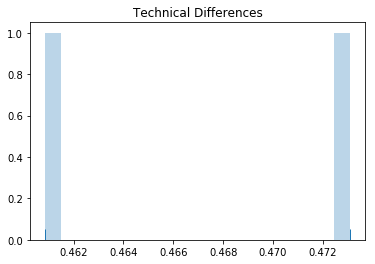

[0.46086402254243153, 0.47307482349832436]


In [13]:
#technical_replicates = ([0,1,2],[3,4,5],[6,8]) #MS3
#technical_replicates = ([10,11,12],[13,14,15],[16,18]) #MS3 uncorrected

tech_dif = []
for sample in technical_replicates:
    sample_dif = []
    for i in sample:
        for x in sample:
            if i != x:
                sample_dif.append(differences[i][x])
    sample_dif =skipZeroMean(sample_dif)
    tech_dif.append(sample_dif)

plt.hist(tech_dif, alpha=.3, bins = 20)
plt.title("Technical Differences")
sns.rugplot(tech_dif)
plt.show()
print(tech_dif)